We learn how to process csv files using command lines, import to the database, now we willlearn how to manipulate the data in Python

In [1]:
import numpy as np
import pandas as pd
import psycopg2 as pg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def print_histograms (df):
    for x in df.columns:
        plt.figure()
        #print df.groupby(x).count()
        getattr(df,x).value_counts(dropna=False).plot(kind='bar', title=x)

conn.cursor will return a cursor object, you can use this cursor to perform queries

/opt/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,34,36,37,41,49,51,53,56,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


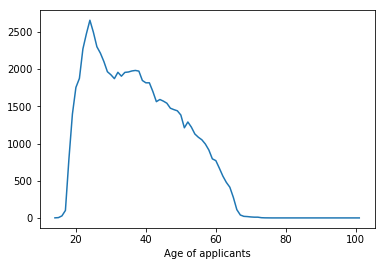

In [3]:
import csv
data=pd.read_csv('/mnt/data/shared/rawData/unl-Pedido_from_xls.csv')
#data=pd.read_csv('/mnt/data/shared/rawData/unl-Pedido_from_xls.csv')
data.shape
data.rename(columns={"Candidatura-Local_Trabalho":"area"},inplace=True)
data.rename(columns={"Ute-Plano_Emprego":"plan"},inplace=True)
data.rename(columns={"Ute-Id":"ute_id"},inplace=True)
data.rename(columns={"Ute-Plano_Emprego_Anterior":"oldPlan"},inplace=True)
data.rename(columns={"Candidatura-Formacao_Prof?":"hasTraining"},inplace=True)
data.rename(columns={"Reinscricao_Ult_Saida_Motivo":"ReasonForExitLastTime"},inplace=True)
data.rename(columns={"DArea_Formacao-Tabela_em_Activo":"TypeOfTraining"},inplace=True)
data.rename(columns={"Sub-Rsi":"SocialIncome"},inplace=True)
data.rename(columns={"DCae_Anterior":"PreviousEconomicActivity"},inplace=True)
data.rename(columns={"AnoMes":"Date"},inplace=True)
data.rename(columns={"Ute-Data_Nascimento":"born"},inplace=True)
data.rename(columns={"DHabilitacao_Escolar":"education"},inplace=True)
data.columns
#data.ReasonForApplying.unique()
smallData=data[["ute_id","Date","education","born","SocialIncome"]]
smallData=smallData[pd.notnull(smallData['born'])]
aDate=smallData["Date"][50839]
smallData["born"]=smallData["born"].str[-4:].astype(int)
smallData['Date'] = smallData['Date'].apply(lambda x: int(str(x)[0:4]))
smallData['age']=smallData['Date']-smallData["born"]
theAge=smallData.groupby("age").count().index.tolist()
frequency=smallData.groupby("age").count()["ute_id"].tolist()
plt.plot(theAge,frequency)
plt.xlabel("Age of applicants")

#smallData=data[["ute_id","Date","BirthDate","education","SocialIncome"]]
#data['plan'] = data['ute_id'].apply(lambda x: user_counts[x])
#data.groupby(['plan', 'ute_id']).ute_id.agg(['count']) #does not take into account the fact that one user ID could be both


In [4]:
def generate_df(table_list):
    df_dict = {}
    for table in table_list:
        df_dict[table] = pd.read_csv('/mnt/data/shared/workingData/csv-files/'+table)
    return df_dict

In [5]:
#test=pd.read_csv('/mnt/data/shared/workingData/csv-files/unl-Pedido-fixed.csv')
#test.head
df_dict = generate_df(['unl-Pedido-fixed.csv','unl-sie-31.csv','unl-sie-43.csv','unl-sie-38-fixed.csv','unl-sie-36-falta id.csv','unl-sie-37.csv'])

/opt/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,12,13,24,25,27,28,38,39,52) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,AnoMes,CTipo Movimento,DTipo_Movimento,Ute-Id,Convocatoria Tipo,DTipo Convocatória,Convocatoria Resultado,DResultado Convocatória
0,200701,38,RESULTADO CONVOCATÓRIAS,103680,GR,GERAL UTENTE,6,COMPARECEU
1,200701,38,RESULTADO CONVOCATÓRIAS,1049545,OF,OFERTA,2,APRESENTADO
2,200701,38,RESULTADO CONVOCATÓRIAS,677,GR,GERAL UTENTE,6,COMPARECEU
3,200701,38,RESULTADO CONVOCATÓRIAS,1129039,GR,GERAL UTENTE,8,NÃO COMPARECEU INJUSTIFICADAMENTE
4,200701,38,RESULTADO CONVOCATÓRIAS,115554,OF,OFERTA,2,APRESENTADO
5,200701,38,RESULTADO CONVOCATÓRIAS,1183200,GR,GERAL UTENTE,8,NÃO COMPARECEU INJUSTIFICADAMENTE
6,200701,38,RESULTADO CONVOCATÓRIAS,1191961,OF,OFERTA,2,APRESENTADO
7,200701,38,RESULTADO CONVOCATÓRIAS,1199775,OF,OFERTA,2,APRESENTADO
8,200701,38,RESULTADO CONVOCATÓRIAS,1263911,GR,GERAL UTENTE,5,ANULADA
9,200701,38,RESULTADO CONVOCATÓRIAS,131187,OF,OFERTA,2,APRESENTADO


In [6]:

df_dict = generate_df(['unl-Pedido-fixed.csv','unl-sie-31.csv','unl-sie-43.csv','unl-sie-38-fixed.csv','unl-sie-36-falta id.csv','unl-sie-37.csv'])
apps_df = df_dict['unl-Pedido-fixed.csv']
cancel_df = df_dict['unl-sie-31.csv']
cat_changes_df = df_dict['unl-sie-43.csv']
convocation_df = df_dict['unl-sie-38-fixed.csv']
interventions_df = df_dict['unl-sie-36-falta id.csv']
interviews_df = df_dict['unl-sie-37.csv']
apps_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
apps_df.rename(columns={"Candidatura-Origem":"Cause"},inplace=True)
apps_df.rename(columns={"AnoMes":"Date"},inplace=True)
apps_df=apps_df[pd.notnull(apps_df['Cause'])]
apps_df=apps_df[pd.notnull(apps_df['Date'])]
apps_df["Date"]=(apps_df["Date"].astype(str).str[:4].astype(int)-2005)*12+apps_df["Date"].astype(str).str[5:7].astype(int)
#apps_df["Date"]=(apps_df["Date"].str[:4].astype(int)-2005)*12+apps_df["Date"].str[5:7].astype(int)
apps_df=apps_df[["ute_id","Date","Cause"]]
apps_df["type"]="application"
apps_df.head()
cancel_df.rename(columns={"ID":"ute_id"},inplace=True)
cancel_df.rename(columns={"DMotivo Anulação":"Cause"},inplace=True)
cancel_df.rename(columns={'AnoMes':"Date"},inplace=True)
cancel_df=cancel_df[pd.notnull(cancel_df['Date'])]
#cancel_df["Date"]=(cancel_df["Date"].str[:4].astype(int)-2005)*12+cancel_df["Date"].str[5:7].astype(int)
cancel_df["Date"]=(cancel_df["Date"].astype(str).str[:4].astype(int)-2005)*12+cancel_df["Date"].astype(str).str[5:7].astype(int)
cancel_df=cancel_df[["ute_id","Date","Cause"]]
cancel_df["type"]="cancellation"
#cat_changes_df.head()
cat_changes_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
cat_changes_df.rename(columns={"DCategoria":"Cause"},inplace=True)
cat_changes_df.rename(columns={'AnoMes':"Date"},inplace=True)
cat_changes_df=cat_changes_df[pd.notnull(cat_changes_df['Date'])]
cat_changes_df["Date"]=(cat_changes_df["Date"].astype(str).str[:4].astype(int)-2005)*12+cat_changes_df["Date"].astype(str).str[5:7].astype(int)
cat_changes_df=cat_changes_df[["ute_id","Date","Cause"]]
cat_changes_df["type"]="statusChange"

convocation_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
convocation_df.rename(columns={"DResultado Convocatória":"Result"},inplace=True)
convocation_df.rename(columns={"DTipo Convocatória":"TypeOfIntervention"},inplace=True)
convocation_df.head()
convocation_df.rename(columns={'AnoMes':"Date"},inplace=True)
convocation_df=convocation_df[pd.notnull(convocation_df['Date'])]
convocation_df["Date"]=(convocation_df["Date"].astype(str).str[:4].astype(int)-2005)*12+convocation_df["Date"].astype(str).str[5:7].astype(int)
convocation_df=convocation_df[["ute_id","Date","Result","TypeOfIntervention"]]
convocation_df["type"]="convocation"

interventions_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
interventions_df.rename(columns={"Intervenção Codigo D":"Cause"},inplace=True)
interventions_df.rename(columns={'AnoMes':"Date"},inplace=True)
interventions_df=interventions_df[pd.notnull(interventions_df['Date'])]
interventions_df["Date"]=(interventions_df["Date"].astype(str).str[:4].astype(int)-2005)*12+interventions_df["Date"].astype(str).str[5:7].astype(int)
interventions_df=interventions_df[["ute_id","Date","Cause"]]
interventions_df["type"]="intervention"

interviews_df.rename(columns={"Ute-Id":"ute_id"},inplace=True)
interviews_df.rename(columns={"DResultado Apresentação":"Cause"},inplace=True)
interviews_df.rename(columns={'AnoMes':"Date"},inplace=True)
interviews_df=interviews_df[pd.notnull(interviews_df['Date'])]
interviews_df["Date"]=(interviews_df["Date"].astype(str).str[:4].astype(int)-2005)*12+interviews_df["Date"].astype(str).str[5:7].astype(int)
interviews_df=interviews_df[["ute_id","Date","Cause"]]
interviews_df["type"]="interviews"
interviews_df.head()



,ute_id,Date,Cause,type
0,1060922,25,RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENT...,interviews
1,1062047,25,ADMITIDO / COLOCADO,interviews
2,1062047,25,RECUSA ENTIDADE EMPREGADORA- OUTROSMOTIVOS,interviews
3,1080395,25,ADMITIDO / COLOCADO,interviews
4,1133828,25,RECUSA DE ENTIDADE EMPREGADORA - POSTO JÁ PREE...,interviews


        Date   ute_id          type
17601     26  4044371   application
30073     37  4044371   convocation
16250     37  4044371    interviews
31745     38  4044371   convocation
31746     38  4044371   convocation
4844      38  4044371  intervention
12728     39  4044371  cancellation
33164     39  4044371   convocation
33165     39  4044371   convocation
54965     75  4044371   application
65079     76  4044371    interviews
67341     78  4044371    interviews
30732     86  4044371  statusChange
52287     87  4044371  cancellation
105333   122  4044371   application
86496    122  4044371  cancellation
17602     26  4044456   application
16251     37  4044456    interviews
12060     38  4044456  cancellation
31747     38  4044456   convocation
23600     43  4044456   application
17683     45  4044456  cancellation
43434     45  4044456   convocation
44543     84  4044456  intervention
111454    85  4044456   convocation
69437     89  4044456   application
95603     89  4044456   conv

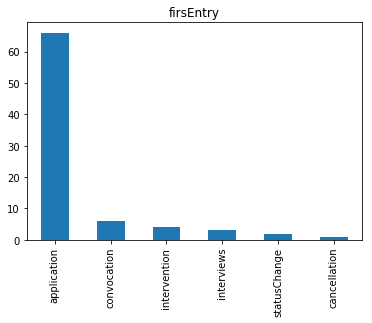

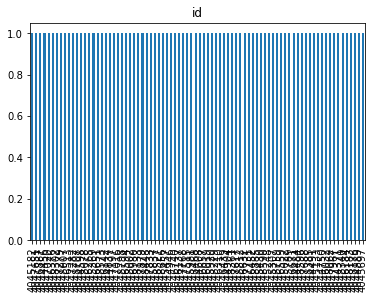

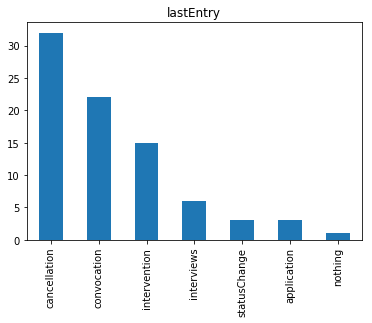

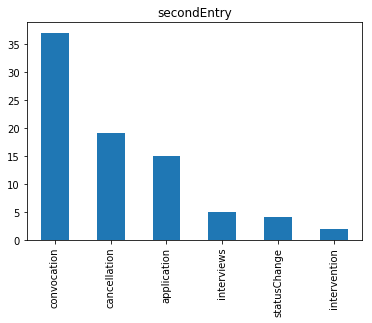

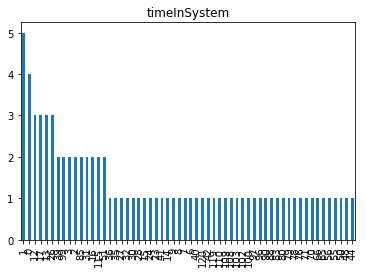

In [7]:
frames=[apps_df,cancel_df,cat_changes_df,convocation_df,interventions_df,interviews_df]
total=pd.concat(frames)
#print len(total.ute_id.unique())
#len(total.groupby("ute_id")["ute_id"])
#print total.groupby("ute_id").count()
total=total.sort_values(["ute_id","Date"])
#total=total.sort_values(["Date","ute_id"])
#total=total[total["Date"]>100]
total=total[["Date","ute_id","type"]]
counter=0
previousid=0
#print total.head(100)
firstEntryPoint=[]
lastEntry=[]
secondEntry=[]
idOfPerson=[]
betweenFirstAndLastInteraction=[]
findFirst=False
previousType="nothing"
entryDate=0
previousDate=0
startDate=0
total=total[500000:600000]
for index,row in total.iterrows():
    id=row["ute_id"]
    if findFirst:
        secondEntry.append(row["type"])
        findFirst=False
    if id!=previousid:
        betweenFirstAndLastInteraction.append(previousDate-startDate)
        lastEntry.append(previousType)
        findFirst=True
        startDate=row["Date"]
        idOfPerson.append(row["ute_id"])
        firstEntryPoint.append(row["type"])
    previousid=id
    previousType=row["type"]
    previousDate=row["Date"]
    if counter>1000:
        break
    counter+=1

print total[:100]
theTable=pd.DataFrame.from_records({"id":idOfPerson,"firsEntry":firstEntryPoint,"secondEntry":secondEntry,"lastEntry":lastEntry,"timeInSystem":betweenFirstAndLastInteraction})

#print total.shape
#print theTable.groupby("lastEntry").count()
print_histograms(theTable)
    
##len(total["ute_id"])

['FALTA AO CONTROLO', 'FALTA A CONVOCAT\xc3\x93RIA', 'COLOCA\xc3\x87\xc3\x83O POR MEIOS PR\xc3\x93PRIOS, POR CONTA DE OUTREM', 'EMIGRA\xc3\x87\xc3\x83O, AUS\xc3\x8aNCIA DO PA\xc3\x8dS', 'TRANSFER\xc3\x8aNCIA DE CENTRO DE EMPREGO', 'REFORMOU-SE', 'FREQU\xc3\x8aNCIA DE FORMA\xc3\x87\xc3\x83O DO IEFP (ENTRADA SGFOR)', 'COLOCA\xc3\x87\xc3\x83O POR MEIOS PR\xc3\x93PRIOS, POR CONTA PR\xc3\x93PRIA', 'INSER\xc3\x87\xc3\x83O NOUTROS PROGRAMAS/MEDIDAS EMPREGO (SIEF)', 'DESISTIU', 'OUTROS MOTIVOS', 'INCUMPRIMENTO DA APRESENTA\xc3\x87\xc3\x83O QUINZENAL', 'RECUSA DE INTERVEN\xc3\x87\xc3\x83O', 'INSER\xc3\x87\xc3\x83O POR CONTA OUTR\xc3\x89M, NA SEQU\xc3\x8aNCIA DE PROGRAMA', 'CRIA\xc3\x87\xc3\x83O DO PR\xc3\x93PRIO EMPREGO', 'RECUSA DE FORMA\xc3\x87\xc3\x83O PROFISSIONAL', 'FREQU\xc3\x8aNCIA DE CURSO DE FORMA\xc3\x87\xc3\x83O PROFISSIONAL DO IEFP', 'FALTA \xc3\x80 APRESENTA\xc3\x87\xc3\x83O', 'FREQU\xc3\x8aNCIA DE FORMA\xc3\x87\xc3\x83O EM ENTIDADE EXTERNA AO IEFP', 'INCAPACIDADE PROLONGADA / PERM

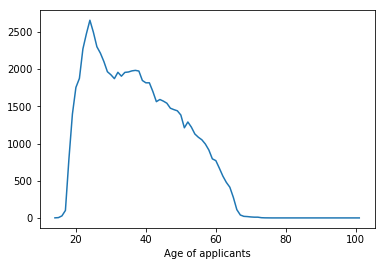

In [260]:
cancellation=pd.read_csv('/mnt/data/shared/workingData/csv-files/unl-sie-31.csv')
cancellation.columns
cancellation.rename(columns={"ID":"ute_id"},inplace=True)
cancellation.rename(columns={"AnoMes":"Date"},inplace=True)
cancellation.rename(columns={"DMotivo Anulação":"Motive"},inplace=True)
cancellation.rename(columns={'Anulacao Data':"AnullationDate"},inplace=True)
cancellation.columns
smallCancellation=cancellation[["ute_id","Motive","AnullationDate"]]

test=smallCancellation.groupby(['Motive']).Motive.agg(['count'])
causes test.sort_values(['count'],ascending=[0]).index.tolist()
for cause in causes:
    only=smallCancellation.loc[smallCancellation['Motive'] ==cause]
    
    
    
    
#print only
#print smallCancellation.groupby("Motive").count()
#test=smallCancellation.groupby(['Motive']).Motive.agg(['count'])
#print test.sort_values(['count'],ascending=[0])
final = pd.merge(only,smallData, how='outer', on=['ute_id'])
#print final.head(100)
theAge=final.groupby("age").count().index.tolist()
frequency=final.groupby("age").count()["ute_id"].tolist()
plt.plot(theAge,frequency)
plt.xlabel("Age of applicants")
#cancellation.describe(include=['O'])
#cancellation.columns
#cancellation.shape


Descriptive Statistics

Pandas provides some great functions for descriptive statistics. Some examples:

    describe() - "computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course)" ( See documentation)
        includes the count of values, mean, standard deviation, min, 25%, 50%, and 75% values, and the max.

    head() and tail(), shown above - "To view a small sample of a Series or DataFrame object, use the head() and tail() methods. The default number of elements to display is five, but you may pass a custom number." ( See documentation.
    value_counts() - The value_counts() "series method and top-level function computes a histogram of a one-dimensional array of values." ( See documentation ). This method returns a Series of the counts of the number of times each unique value in the column is present in the column (also known as frequencies), from largest count to least, with the value itself the label for each row.



Describing the entire dataframe

Now that we have columns, we want to get a better global view of our data. There are several ways

In [67]:
data.describe(include='all')

,Sit_Anterior-Prof-Tempo_Pratica,area,plan
count,111601.000000,103646,125029
unique,NaN,3,2
top,NaN,C,N
freq,NaN,97265,85781
mean,74.930691,NaN,NaN
std,93.623277,NaN,NaN
min,0.000000,NaN,NaN
25%,12.000000,NaN,NaN
50%,36.000000,NaN,NaN
75%,108.000000,NaN,NaN


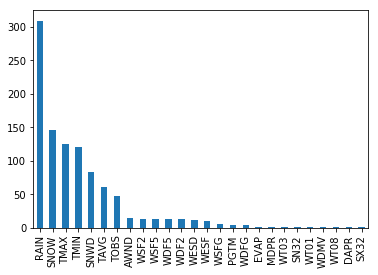

In [30]:
weather['value_type'].value_counts().plot(kind='bar')

Subset of dataset similar as select * from weather where value_type == 'RAIN'

In [39]:
weather[weather['value_type'] == "RAIN"]

,station,date,value_type,value,datetime
0,US1TXCML112,2016-04-16,RAIN,5,2016-04-16
1,US1TXBEL028,2016-04-16,RAIN,0,2016-04-16
3,US1TXAG0003,2016-04-16,RAIN,0,2016-04-16
5,US1TNGN0008,2016-04-16,RAIN,0,2016-04-16
6,US1TNCF0027,2016-04-16,RAIN,0,2016-04-16
8,ASN00109512,2016-04-16,RAIN,10,2016-04-16
9,US1SDKY0009,2016-04-16,RAIN,5,2016-04-16
12,US1TXBEE018,2016-04-16,RAIN,0,2016-04-16
16,ASN00096003,2016-04-16,RAIN,10,2016-04-16
18,US1SCOC0060,2016-04-16,RAIN,0,2016-04-16


select station, date, value_type, 
value from qhan.weather 
where value_type = 'RAIN' and value > 300;

In [40]:
weather[(weather['value_type'] == "RAIN") & (weather['value'] > 300)]

,station,date,value_type,value,datetime
80,USC00229400,2016-04-16,RAIN,381,2016-04-16
215,US1KSSV0018,2016-04-16,RAIN,678,2016-04-16
216,US1KSLG0005,2016-04-16,RAIN,320,2016-04-16
652,US1OKCM0007,2016-04-16,RAIN,1270,2016-04-16
676,CA1ON000218,2016-04-16,RAIN,320,2016-04-16
840,US1KSST0001,2016-04-16,RAIN,305,2016-04-16
841,US1KSSV0019,2016-04-16,RAIN,815,2016-04-16
923,UY000086565,2016-04-16,RAIN,1905,2016-04-16
975,ASN00032031,2016-04-16,RAIN,354,2016-04-16


In [41]:
weather['datetime'] = pd.to_datetime(weather.date, format='%Y-%m-%d')

In [42]:
weather.dtypes

station               object
date                  object
value_type            object
value                  int64
datetime      datetime64[ns]
dtype: object

select count(distinct station) as number_stations 
from weather
where date between '2016-01-01' and '2016-02-01' 
and value_type = 'SNOW'
and value > 100; 

In [43]:
weather[(weather['value_type'] == "SNOW") & (weather['value'] > 300) 
        & (weather['datetime'] > "2016-01-01") & (weather['datetime'] < "2016-02-01")]

,station,date,value_type,value,datetime


Groupby is a powerful method that makes it easy to peform operations on the dataframe by categorial values. Let's try generating a plot of min, max, and average temp over time.

In [44]:
weather.groupby('value_type').value.mean()

value_type
AWND      37.000000
DAPR       5.000000
EVAP      51.000000
MDPR     249.000000
PGTM    1677.250000
RAIN      34.974110
SN32      56.000000
SNOW       4.849315
SNWD     101.481928
SX32     117.000000
TAVG     134.100000
TMAX     188.760000
TMIN      68.661157
TOBS      89.425532
WDF2     118.461538
WDF5     120.000000
WDFG      67.500000
WDMV      51.000000
WESD    2126.727273
WESF      31.100000
WSF2      88.384615
WSF5     118.769231
WSFG      30.400000
WT01       1.000000
WT03       1.000000
WT08       1.000000
Name: value, dtype: float64

In [46]:
prip = weather[weather['value_type'].isin(["RAIN", "SNOW"])]

In [48]:
prip.value_type.value_counts()

RAIN    309
SNOW    146
Name: value_type, dtype: int64

prip.value.plot()

agg(regation) method allows you to run summary statistics after you groupby the records

In [49]:
prip.groupby('value_type').value.agg(['count','min','max','mean'])

,count,min,max,mean
value_type,,,,
RAIN,309,0,1905,34.974110
SNOW,146,0,318,4.849315


In [50]:
weather.index

RangeIndex(start=0, stop=1000, step=1)

After you finish the processing, you can export the data.frame to csv (df.to_csv), excel (df.to_excel) 

In [51]:
weather.to_csv('weather.csv', index=False)

If you are using MS SQL Server, we need to set up a generic db connection using sqlalchemy

In [ ]:
cancellation=pd.read_csv('/mnt/data/shared/workingData/csv-files/unl-sie-31.csv')
cancellation.rename(columns={"ID":"ute_id"},inplace=True)
cancellation.rename(columns={"AnoMes":"Date"},inplace=True)
cancellation.rename(columns={"DMotivo Anulaçã
   

Refer to http://pandas.pydata.org/pandas-docs/stable/tutorials.html for more tutorials regarding pandas